In [1]:
import pandas as pd
import seaborn as sns 
df = pd.read_csv("../data/input_size.csv")
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
df['usb_type'] = df['usb_type'].map(lambda x: "USB V2" if x=="usb2" else "USB V3")
df['m_input_size'] = df["input_size"]/1000000

In [3]:
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

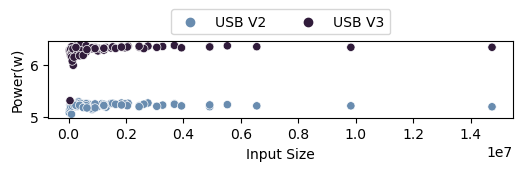

In [4]:
ax = sns.scatterplot(data=df[ (df["tpu_mode"]=="std") & (df["block_type"]=="fullconv")], x="input_size", y="total_power_avg", hue="usb_type", palette=[palette.colors[120], palette.colors[-1]])
ax.set_ylabel("Power(w)")
ax.set_xlabel("Input Size")
ax.figure.set_size_inches(6,1)
ax.legend().set_title("")
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.5), ncol=2)
ax.figure.savefig("../output/power_input_size_usb.png")

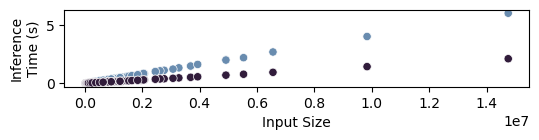

In [5]:
ax = sns.scatterplot(data=df[ (df["tpu_mode"]=="std") & (df["block_type"]=="fullconv")], x="input_size", y="inference_time_per_input", hue="usb_type", palette=[palette.colors[120], palette.colors[-1]])
ax.set_ylabel("Inference\nTime (s)")
ax.set_xlabel("Input Size")
ax.figure.set_size_inches(6,1)
ax.legend().remove()
ax.figure.savefig("../output/inference_time_input_size_usb.png")

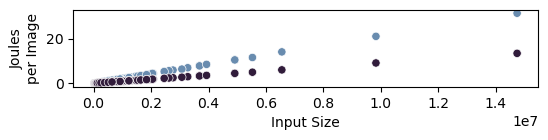

In [6]:
ax = sns.scatterplot(data=df[ (df["tpu_mode"]=="std") & (df["block_type"]=="fullconv")], x="input_size", y="joules_per_input", hue="usb_type", palette=[palette.colors[120], palette.colors[-1]])
ax.set_ylabel("Joules\nper Image")
ax.set_xlabel("Input Size")
ax.figure.set_size_inches(6,1)
ax.legend().remove()
ax.figure.savefig("../output/joules_input_size_usb.png")

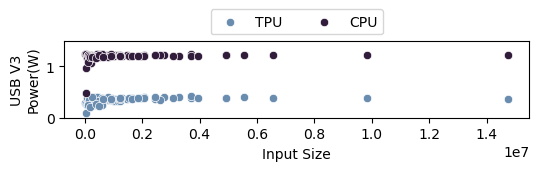

In [7]:
ax = sns.scatterplot(df[(df["usb_type"] == "USB V3")& (df["block_type"]=="fullconv")& (df["tpu_mode"]=="std")],x="input_size", y="tpu_power_avg", color=palette.colors[120], 
                     label="TPU")
ax = sns.scatterplot(df[(df["usb_type"] == "USB V3")& (df["block_type"]=="fullconv")& (df["tpu_mode"]=="std")],x="input_size", y="cpu_power_avg", ax=ax, color=palette.colors[-1],
                    label="CPU")
ax.set(ylim=(0., 1.5))
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.5), ncol=2)

ax.set_ylabel("USB V3\nPower(W)")
ax.set_xlabel("Input Size")
ax.figure.set_size_inches(6,1)

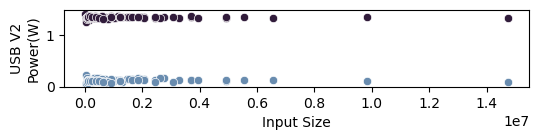

In [8]:
ax = sns.scatterplot(df[(df["usb_type"] == "USB V2")& (df["block_type"]=="fullconv")& (df["tpu_mode"]=="std")],x="input_size", y="tpu_power_avg", color=palette.colors[120], 
                     label="TPU")
ax = sns.scatterplot(df[(df["usb_type"] == "USB V2")& (df["block_type"]=="fullconv")& (df["tpu_mode"]=="std")],x="input_size", y="cpu_power_avg", ax=ax, color=palette.colors[-1],
                    label="CPU")
ax.set(ylim=(0., 1.5))
ax.legend().remove()

ax.set_ylabel("USB V2\nPower(W)")
ax.set_xlabel("Input Size")
ax.figure.set_size_inches(6,1)